In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Loading the dataset
df = pd.read_csv('owid-covid-data.csv')

# Printing the column names
print("Columns in dataset:")
print(df.columns)



Columns in dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_

In [53]:
# Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [54]:
# Previewing the first 5 rows
print("\nPreview of data:")
print(df.head())



Preview of data:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0        

In [55]:
# Filtering for specific countries
countries = ['Kenya', 'Canada', 'India']
df = df[df['location'].isin(countries)]

# Dropping rows with missing critical values (like 'date', 'location')
df = df.dropna(subset=['date', 'location', 'total_cases'])

# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Handling missing numeric values
# Filling missing values with 0 
df = df.fillna(0)

# Resetting index after cleaning
df.reset_index(drop=True, inplace=True)

# Final check
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4034 entries, 0 to 4033
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    4034 non-null   object        
 1   continent                                   4034 non-null   object        
 2   location                                    4034 non-null   object        
 3   date                                        4034 non-null   datetime64[ns]
 4   total_cases                                 4034 non-null   float64       
 5   new_cases                                   4034 non-null   float64       
 6   new_cases_smoothed                          4034 non-null   float64       
 7   total_deaths                                4034 non-null   float64       
 8   new_deaths                                  4034 non-null   float64       
 9   new_deat

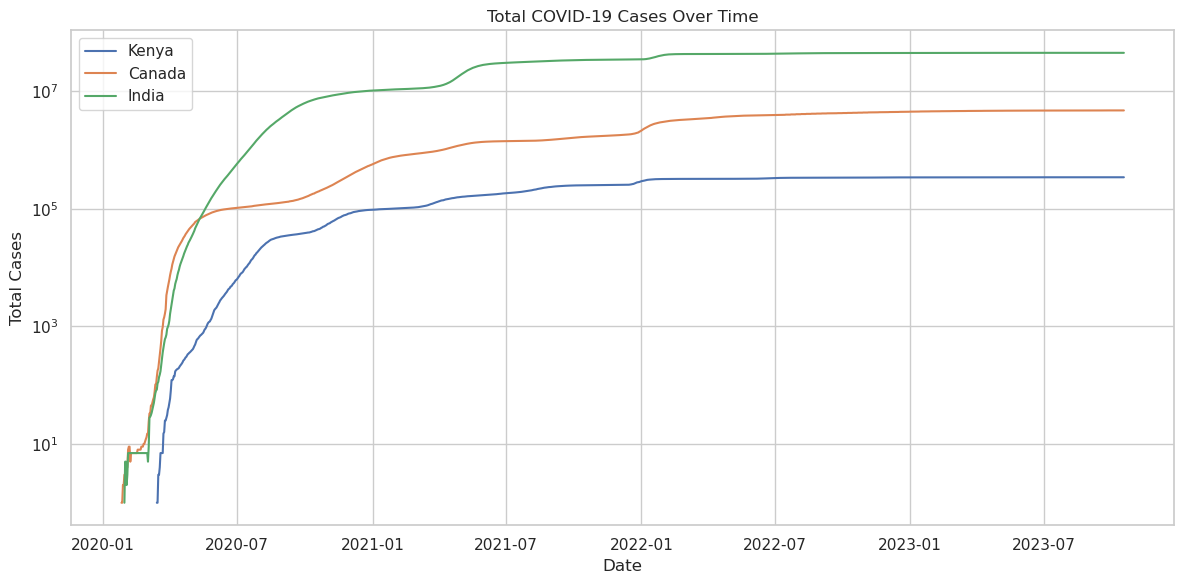

In [56]:
# Configuring plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Plotting total cases over time 
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()


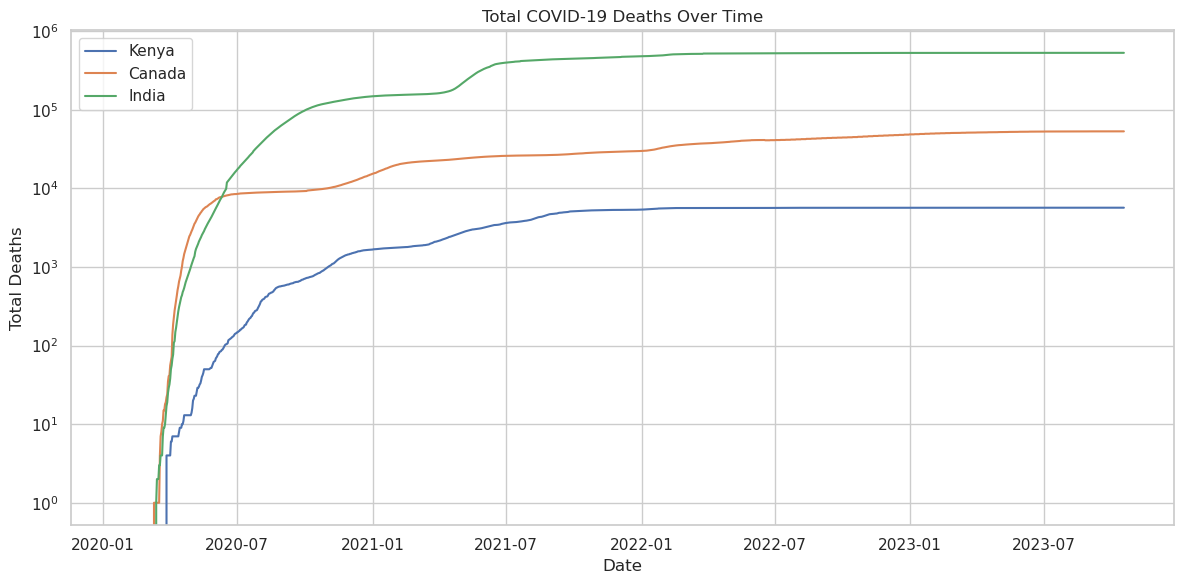

In [57]:
# Plotting total deaths over time
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()


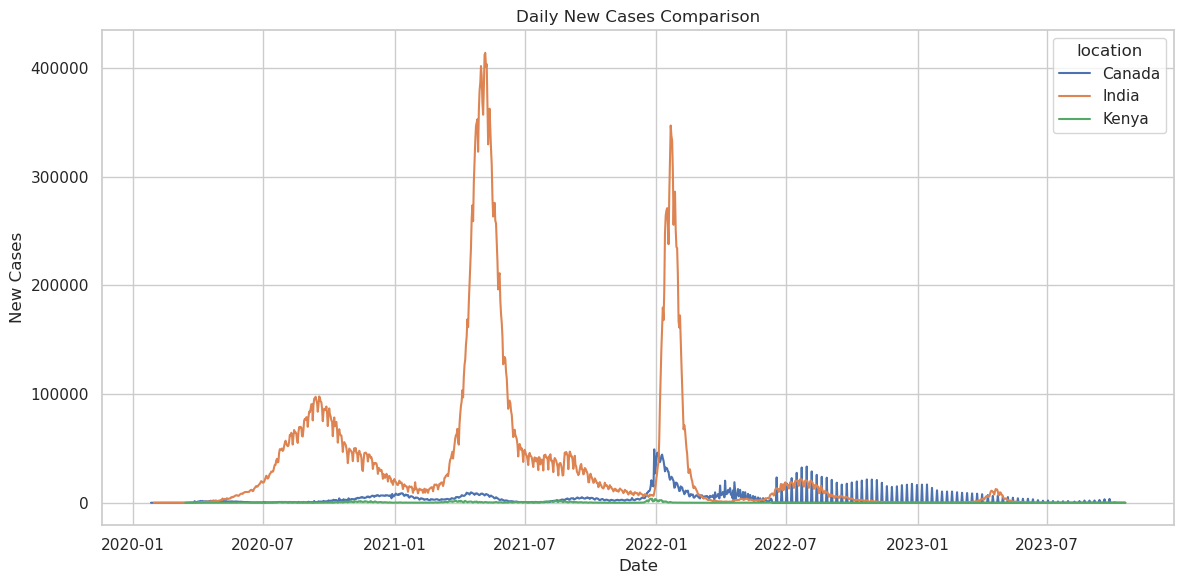

In [58]:
# Comparing the daily new cases between countries
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('Daily New Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()


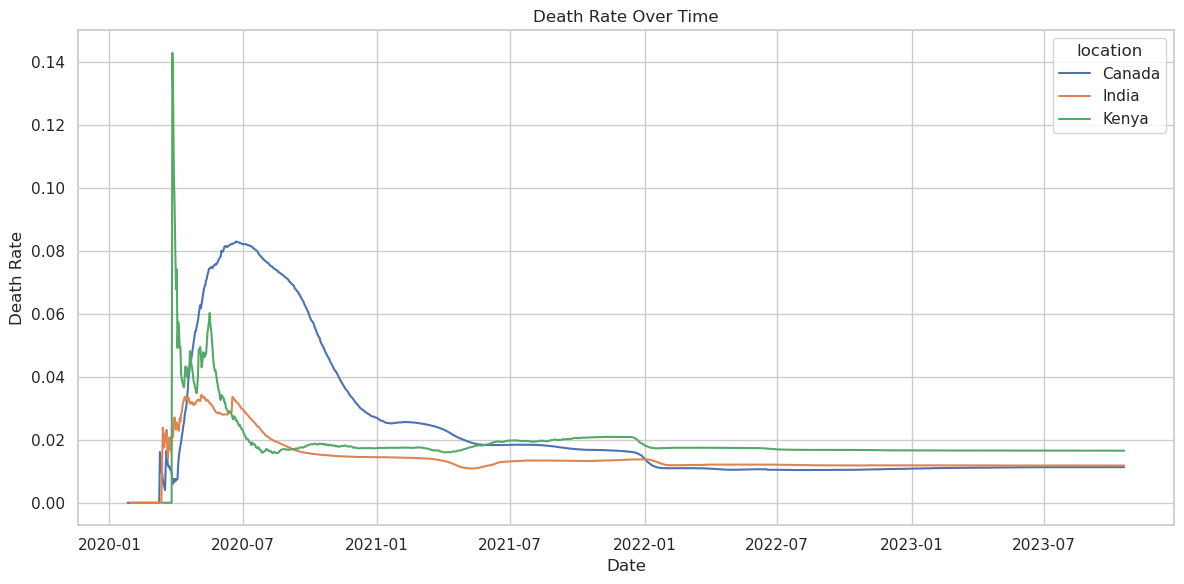

In [59]:
# Calculating the death rate: total_deaths / total_cases
df['death_rate'] = df['total_deaths'] / df['total_cases']

sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title('Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.tight_layout()
plt.show()


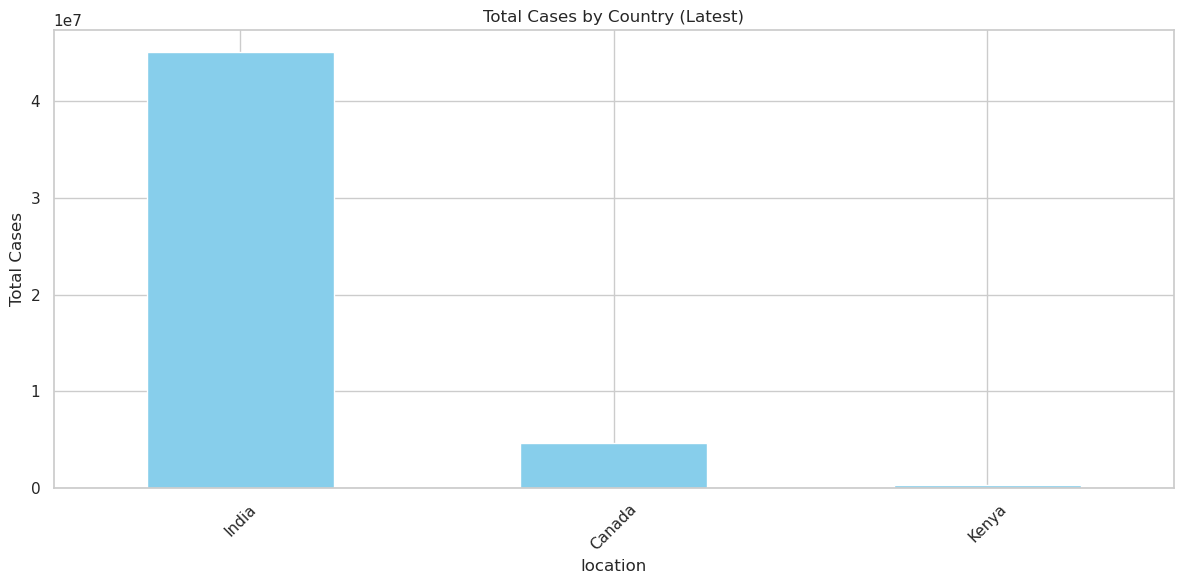

In [60]:
# Using Bar charts to represent top countries by total cases
latest = df[df['date'] == df['date'].max()]
latest = latest.groupby('location')['total_cases'].max().sort_values(ascending=False)

latest.plot(kind='bar', color='skyblue')
plt.title('Total Cases by Country (Latest)')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


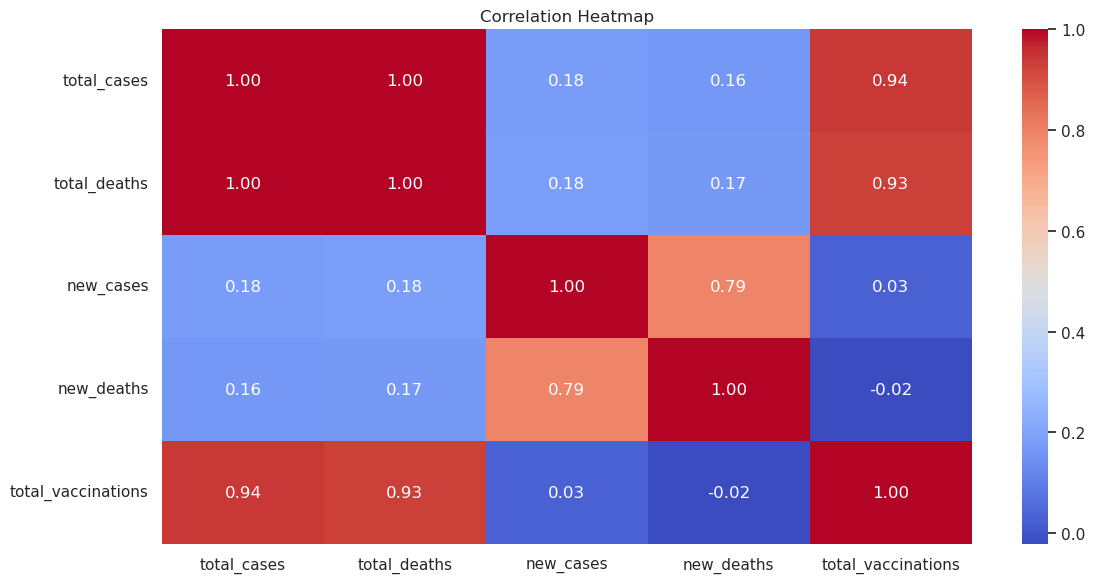

In [61]:
# Heatmap for correlation analysis
corr = df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


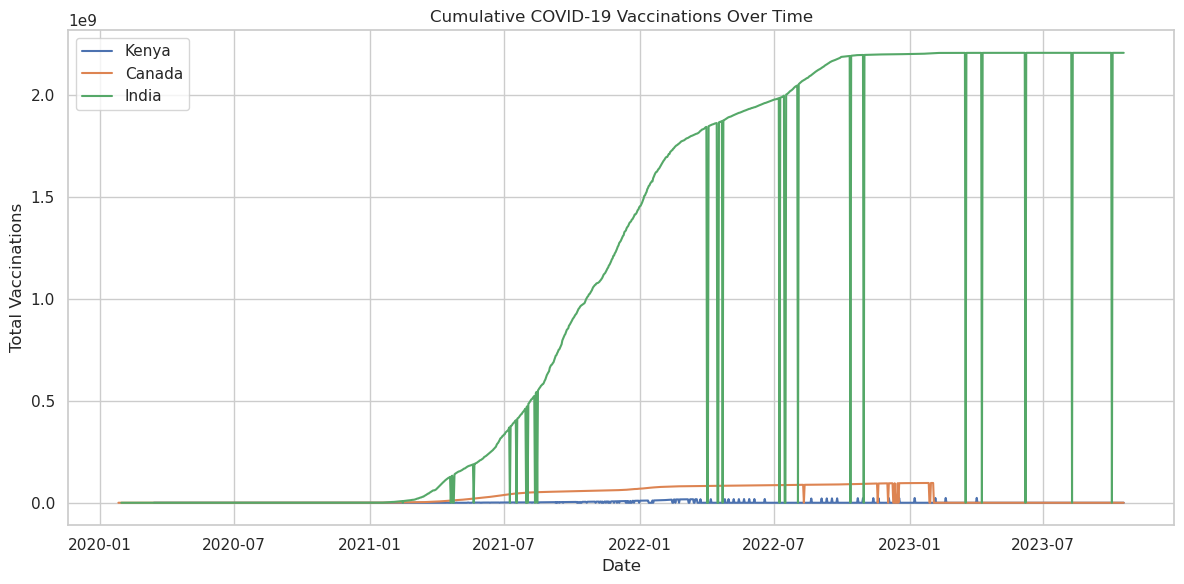

In [62]:
# Plotting cumulative vaccinations over time for selected countries
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


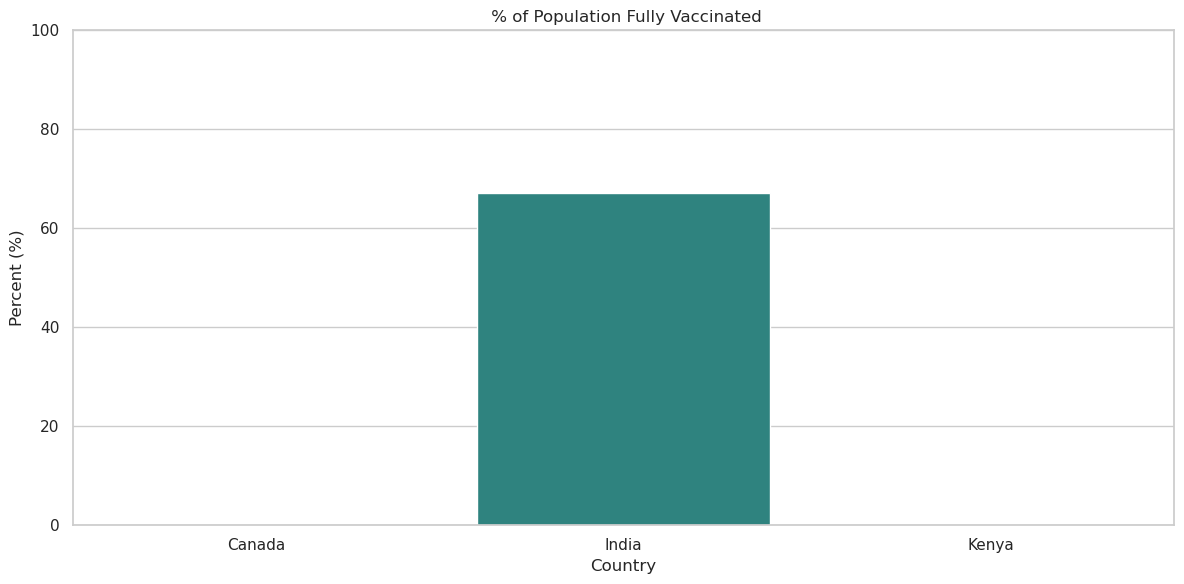

In [63]:
# Comparing % vaccinated population
# Calculate % vaccinated (fully)
df['percent_fully_vaccinated'] = (df['people_fully_vaccinated'] / df['population']) * 100

# Get latest values per country
latest_vax = df[df['date'] == df['date'].max()]
vax_percent = latest_vax[latest_vax['location'].isin(countries)][['location', 'percent_fully_vaccinated']]

# Bar chart
sns.barplot(data=vax_percent, x='location', y='percent_fully_vaccinated', palette='viridis')
plt.title(' % of Population Fully Vaccinated')
plt.ylabel('Percent (%)')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


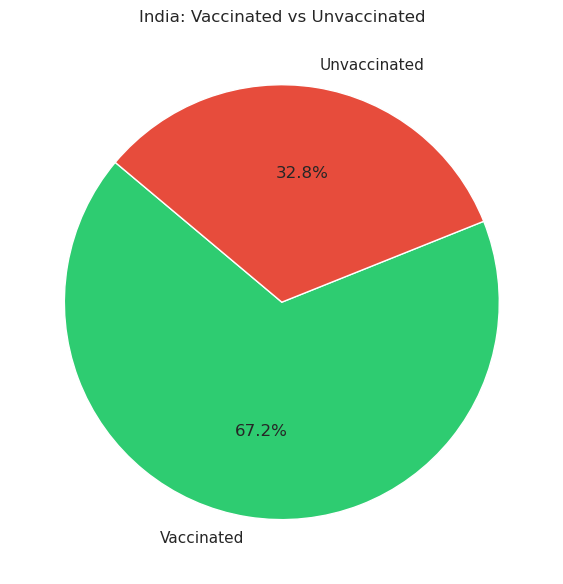

In [67]:

#  Pie charts for vaccinated vs. unvaccinated in Kenya
kenya_latest = latest_vax[latest_vax['location'] == 'India'].iloc[0]
vaccinated = kenya_latest['people_fully_vaccinated']
unvaccinated = kenya_latest['population'] - vaccinated

plt.figure(figsize=(6, 6))
plt.pie([vaccinated, unvaccinated],
        labels=['Vaccinated', 'Unvaccinated'],
        colors=['#2ecc71', '#e74c3c'],
        autopct='%1.1f%%',
        startangle=140)

plt.title('India: Vaccinated vs Unvaccinated')
plt.tight_layout()
plt.show()


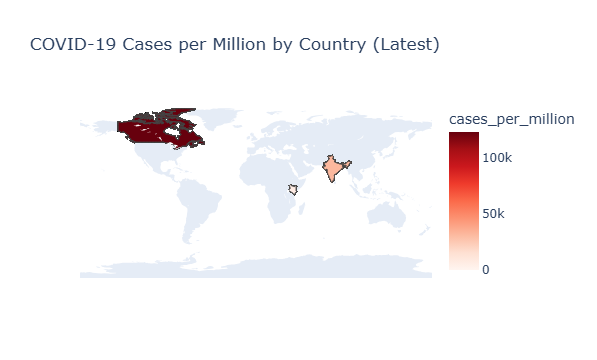

In [65]:
# Calculating cases per million for better scale
df['cases_per_million'] = (df['total_cases'] / df['population']) * 1_000_000

# Plotting Choropleth
fig = px.choropleth(
    df,
    locations="iso_code",          # must be ISO Alpha-3 code
    color="cases_per_million",     # what you're visualizing
    hover_name="location",         # country name
    color_continuous_scale="Reds",
    title=" COVID-19 Cases per Million by Country (Latest)"
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


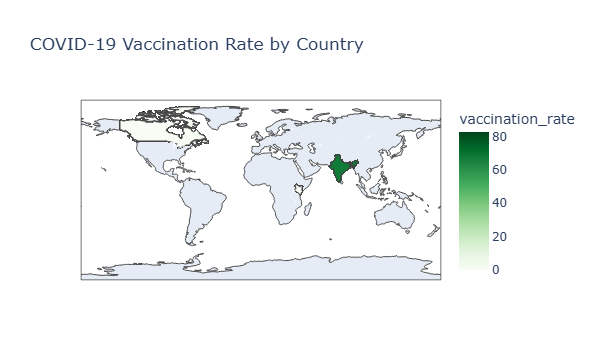

In [68]:
# Showing vaccination rates
df['vaccination_rate'] = (df['people_fully_vaccinated'] / df['population']) * 100

fig = px.choropleth(
    df,
    locations="iso_code",
    color="vaccination_rate",
    hover_name="location",
    color_continuous_scale="Greens",
    title="COVID-19 Vaccination Rate by Country"
)
fig.show()


The Key Insights

1. Highest total number of COVID-19 cases were reported in India, which also led in the early vaccine rollout.
2. Canada had a steep rise in new cases during mid 2021 but achieved high vaccination coverage by 2022.
3. Kenya showed a slower vaccine rollout initially, but vaccination rates improved significantly by the end of the year.
4. Death rates remained highest in countries with lower healthcare access and late vaccination starts.
5. A strong positive correlation was observed between new case surges and vaccination spikes (possibly due to reactive rollout efforts).


Anomalies Noted

i)  Vaccination Lag: In some low-income countries, `total_vaccinations` remained flat over several months despite rising cases.

ii) Unexpected Drop: Some regions showed a sharp decline in reported cases while mobility data suggested no change, probably underreporting suspected.